Import

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Dataset Url

In [2]:
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/adult/adult.data'

Dataset columns

In [3]:
columns = ['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','salary']

Loading Data with Pandas 

In [4]:
df = pd.read_csv(url,names=columns)

In [5]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


Dataset Info

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education-num   32561 non-null  int64 
 5   marital-status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital-gain    32561 non-null  int64 
 11  capital-loss    32561 non-null  int64 
 12  hours-per-week  32561 non-null  int64 
 13  native-country  32561 non-null  object
 14  salary          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


Dataset Shape

In [7]:
df.shape

(32561, 15)

Dataset Description

In [8]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [9]:
df.size

488415

### Feature Engineering

Checking for null Values 

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
native-country    0
salary            0
dtype: int64

In [11]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

Replacing ' ?' with Nan for data cleaning

In [12]:
df.replace(' ?',np.nan,inplace=True)

In [13]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education-num        0
marital-status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital-gain         0
capital-loss         0
hours-per-week       0
native-country     583
salary               0
dtype: int64

In [14]:
df.dtypes

age                int64
workclass         object
fnlwgt             int64
education         object
education-num      int64
marital-status    object
occupation        object
relationship      object
race              object
sex               object
capital-gain       int64
capital-loss       int64
hours-per-week     int64
native-country    object
salary            object
dtype: object

#### Salary

In [15]:
df.salary.unique()

array([' <=50K', ' >50K'], dtype=object)

In [16]:
df = df.replace({' <=50K':0,' >50K':1})

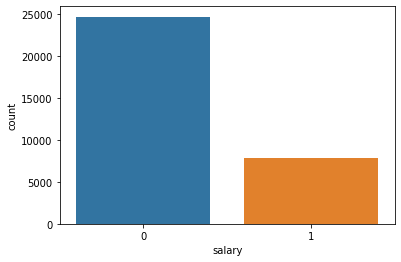

In [17]:
sns.countplot(df['salary'])

In [18]:
df['salary'].value_counts()

0    24720
1     7841
Name: salary, dtype: int64

#### Workclass

In [19]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', nan, ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [20]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [21]:
df= df.replace(' Without-pay', ' Never-worked')

In [22]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Never-worked           21
Name: workclass, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6]), <a list of 7 Text xticklabel objects>)

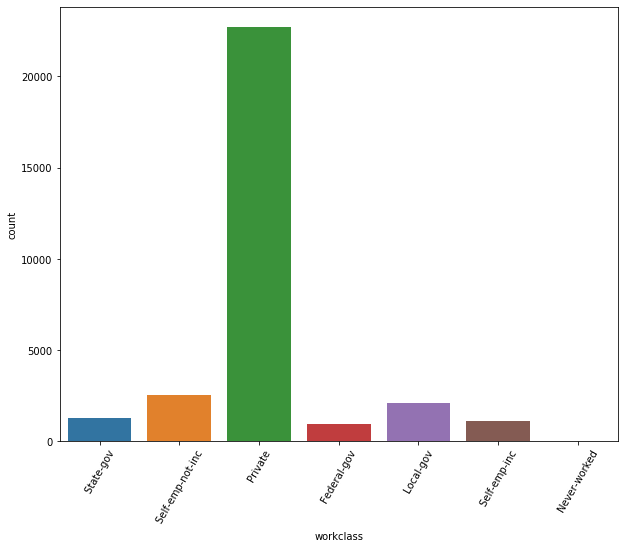

In [23]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

In [24]:
df['workclass'].fillna('0',inplace=True)

(array([0, 1, 2, 3, 4, 5, 6, 7]), <a list of 8 Text xticklabel objects>)

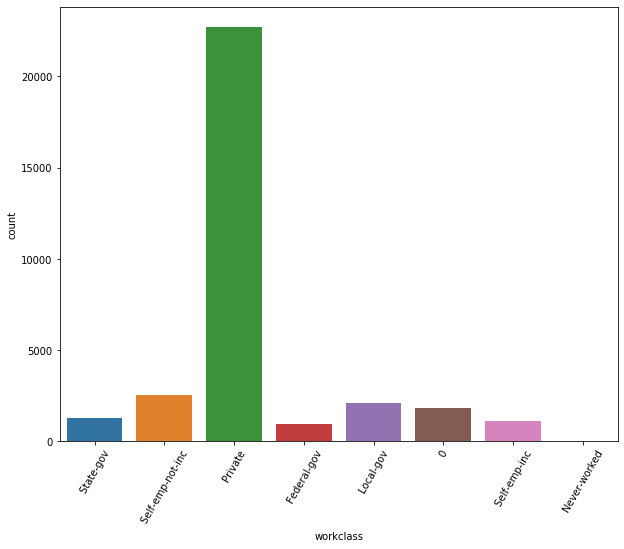

In [25]:
plt.figure(figsize=(10,8))
sns.countplot(df['workclass'])
plt.xticks(rotation=60)

#### Fnlwgt

In [26]:
df['fnlwgt'].describe()

count    3.256100e+04
mean     1.897784e+05
std      1.055500e+05
min      1.228500e+04
25%      1.178270e+05
50%      1.783560e+05
75%      2.370510e+05
max      1.484705e+06
Name: fnlwgt, dtype: float64

In [27]:
df['fnlwgt'] = df['fnlwgt'].apply(lambda x :np.log1p(x))

df['fnlwgt'].describe()

count    32561.000000
mean        11.983778
std          0.630738
min          9.416216
25%         11.676981
50%         12.091542
75%         12.376035
max         14.210727
Name: fnlwgt, dtype: float64

#### Education

In [28]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15]),
 <a list of 16 Text xticklabel objects>)

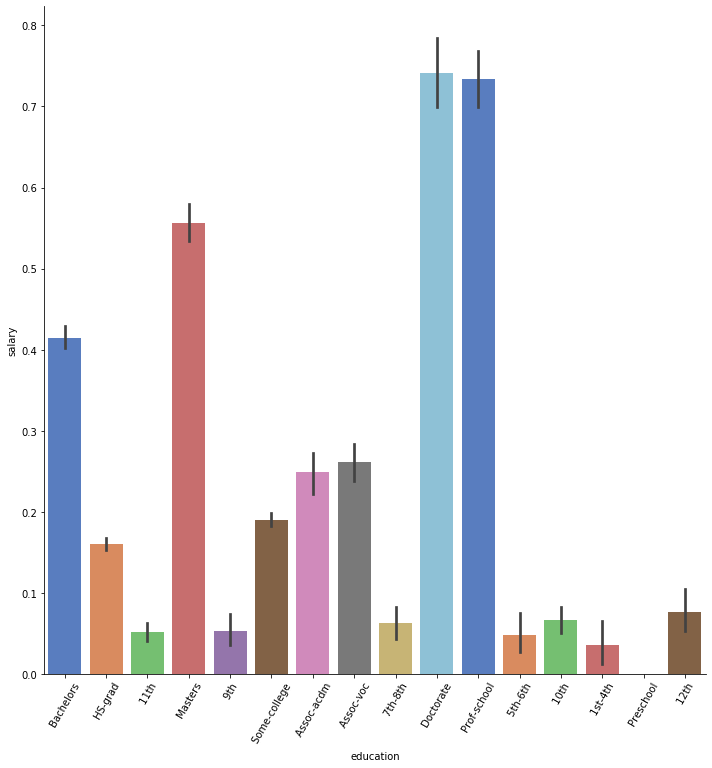

In [29]:
sns.catplot(x='education',y='salary',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

In [30]:
def primary(x):
    if x in [' 1st-4th', ' 5th-6th', ' 7th-8th', ' 9th', ' 10th', ' 11th', ' 12th']:
        return 'Primary'
    else:
        return x

In [31]:
df['education'] = df['education'].apply(primary)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

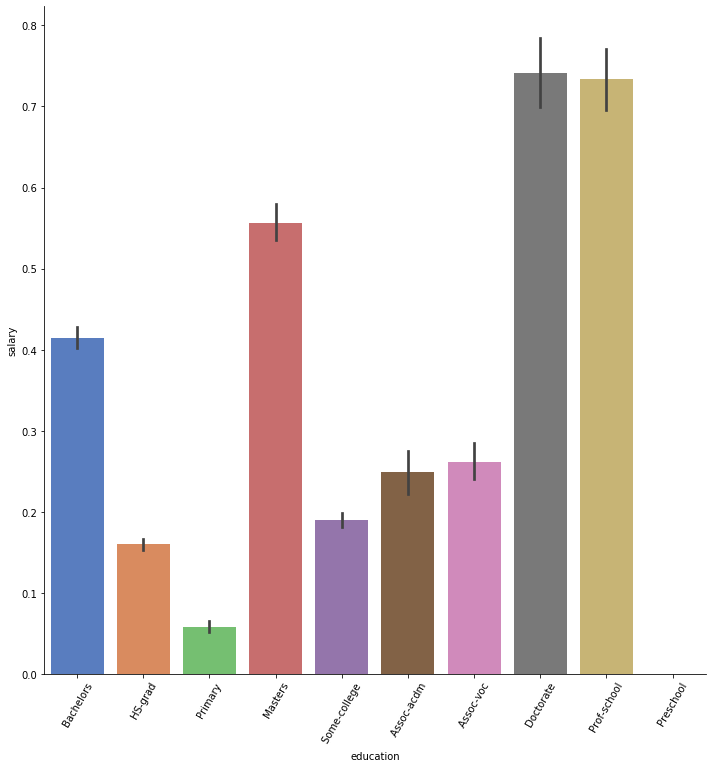

In [32]:
sns.catplot(x='education',y='salary',data=df,height=10,palette='muted',kind='bar')
plt.xticks(rotation=60)

#### Marital-status

In [33]:
df['marital-status'].value_counts()

 Married-civ-spouse       14976
 Never-married            10683
 Divorced                  4443
 Separated                 1025
 Widowed                    993
 Married-spouse-absent      418
 Married-AF-spouse           23
Name: marital-status, dtype: int64

In [34]:
df['marital-status'].replace(' Married-AF-spouse', ' Married-civ-spouse',inplace=True)

(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text xticklabel objects>)

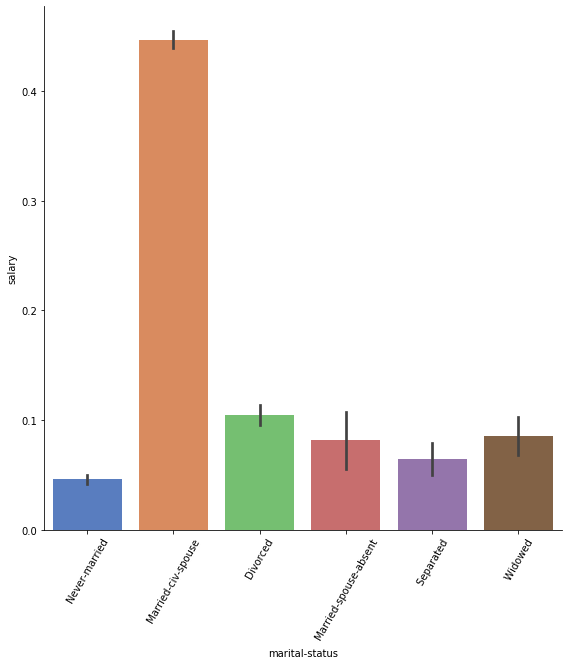

In [35]:
sns.catplot(x='marital-status',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

#### Occupation

In [36]:
df['occupation'].fillna('0',inplace=True)

df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [37]:
df['occupation'].replace(' Armed-Forces','0',inplace=True)

df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
0                     1852
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
Name: occupation, dtype: int64

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13]),
 <a list of 14 Text xticklabel objects>)

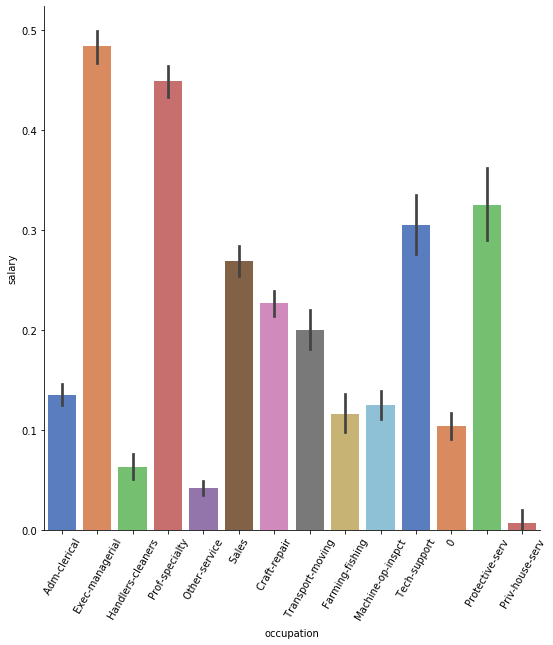

In [38]:
sns.catplot(x='occupation',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

#### Relationship

In [39]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

#### Race

In [40]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

#### Sex

In [41]:
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [42]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'salary'],
      dtype='object')

#### Native-Country

In [43]:
df['native-country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', nan, ' Mexico',
       ' South', ' Puerto-Rico', ' Honduras', ' England', ' Canada',
       ' Germany', ' Iran', ' Philippines', ' Italy', ' Poland',
       ' Columbia', ' Cambodia', ' Thailand', ' Ecuador', ' Laos',
       ' Taiwan', ' Haiti', ' Portugal', ' Dominican-Republic',
       ' El-Salvador', ' France', ' Guatemala', ' China', ' Japan',
       ' Yugoslavia', ' Peru', ' Outlying-US(Guam-USVI-etc)', ' Scotland',
       ' Trinadad&Tobago', ' Greece', ' Nicaragua', ' Vietnam', ' Hong',
       ' Ireland', ' Hungary', ' Holand-Netherlands'], dtype=object)

In [44]:
def native(country):
    if country in [' United-States',' Canada']:
        return 'North_America'
    elif country in [' Puerto-Rico',' El-Salvador',' Cuba',' Jamaica',' Dominican-Republic',' Guatemala',' Haiti',' Nicaragua',' Trinadad&Tobago',' Honduras']:
        return 'Central_America' 
    elif country in [' Mexico',' Columbia',' Vietnam',' Peru',' Ecuador',' South',' Outlying-US(Guam-USVI-etc)']:
        return 'South_America'
    elif country in [' Germany',' England',' Italy',' Poland',' Portugal',' Greece',' Yugoslavia',' France',' Ireland',' Scotland',' Hungary',' Holand-Netherlands']:
        return 'EU'
    elif country in [' India',' Iran',' China',' Japan',' Thailand',' Hong',' Cambodia',' Laos',' Philippines',' Taiwan']:
        return 'Asian'
    else:
        return country

In [45]:
df['native-country'] = df['native-country'].apply(native)

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

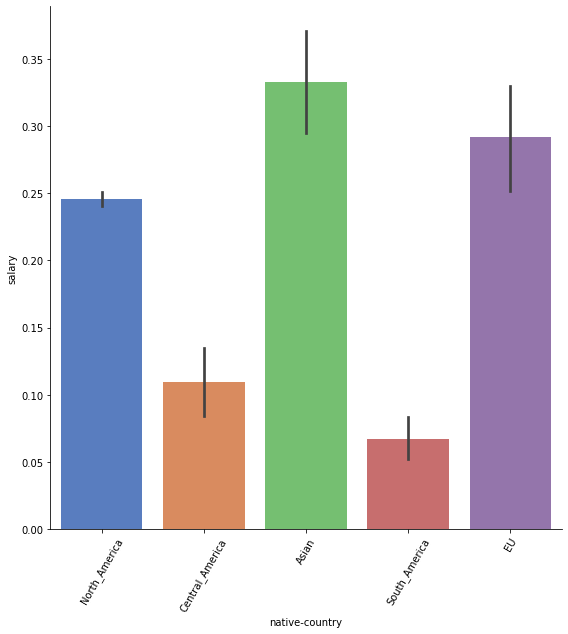

In [46]:
sns.catplot(x='native-country',y='salary',data=df,palette='muted',kind='bar',height=8)
plt.xticks(rotation=60)

Let's check our data's correlation with the help of Heatmap

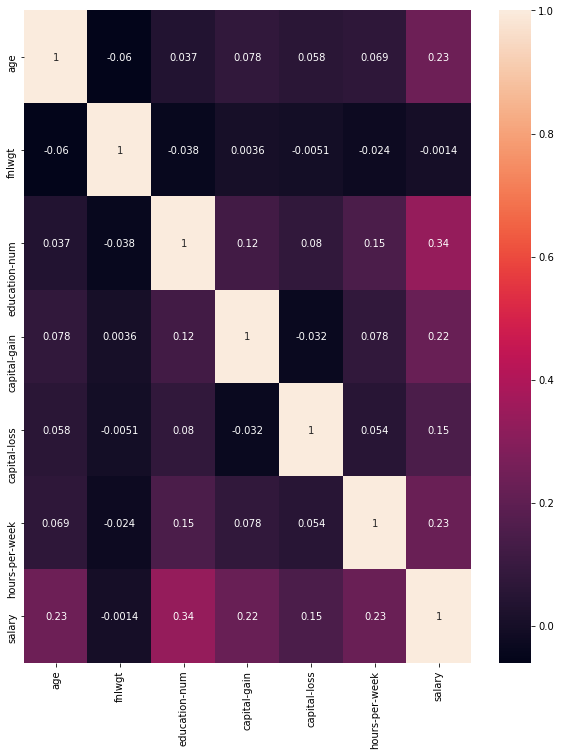

In [47]:
corr = df.corr()
plt.figure(figsize=(10,12))
sns.heatmap(corr,annot=True)

As we can see that corr values of fnlwgt are very low, Hence we can drop it safely.

In [48]:
df.drop('fnlwgt',axis=1,inplace=True)

In [49]:
df.head()

,age,workclass,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,North_America,0
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,North_America,0
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,North_America,0
3,53,Private,Primary,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,North_America,0
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Central_America,0


### Dividing Data into 'X' and 'y'

In [50]:
X = df.drop('salary',axis=1)
y = df['salary']

In [51]:
X.columns

Index(['age', 'workclass', 'education', 'education-num', 'marital-status',
       'occupation', 'relationship', 'race', 'sex', 'capital-gain',
       'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')

Converting Categorical data into Numerical Data 

In [52]:
X_d = pd.get_dummies(X)

In [53]:
X_d.head()

,age,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Never-worked,workclass_ Private,workclass_ Self-emp-inc,...,race_ Black,race_ Other,race_ White,sex_ Female,sex_ Male,native-country_Asian,native-country_Central_America,native-country_EU,native-country_North_America,native-country_South_America
0,39,13,2174,0,40,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
1,50,13,0,0,13,0,0,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,38,9,0,0,40,0,0,0,1,0,...,0,0,1,0,1,0,0,0,1,0
3,53,7,0,0,40,0,0,0,1,0,...,1,0,0,0,1,0,0,0,1,0
4,28,13,0,0,40,0,0,0,1,0,...,1,0,0,1,0,0,1,0,0,0


#### Train_Test_Split

In [54]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(X_d,y,test_size=0.3,random_state=101)

In [55]:
x_train.shape

(22792, 61)

In [56]:
y_train.shape

(22792,)

#### On Applying Algorithms & Evaluating the Models

### 1. Logistic Regression

In [57]:
from sklearn.linear_model import LogisticRegression
Lr = LogisticRegression()
Lr.fit(x_train,y_train)

C:\Users\Shridhar M\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

#### Applying Hyperparams for LogReg model to get best model score

In [58]:
penalty = ['l1', 'l2']
# C is the inverese of regularization parameter
C = np.logspace(0, 4, 10)
random_state=[0]
# creating a dictionary of hyperparameters
hyperparameters = dict(C=C, penalty=penalty, 
                  random_state=random_state)

### GridSearchCV for LogReg

In [59]:
from sklearn.model_selection import GridSearchCV
gsv = GridSearchCV(Lr,param_grid=hyperparameters,cv=5,verbose=3,n_jobs=-1)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:   13.5s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   28.6s finished
C:\Users\Shridhar M\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='warn',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='warn',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='warn', n_jobs=-1,
             param_grid={'C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2'], 'random_state': [0]},
             pre_dispatch='2*n_jobs', refit=True, return_tra

Best_params

In [60]:
gsv.best_params_

{'C': 1.0, 'penalty': 'l1', 'random_state': 0}

In [61]:
lr_tuned = LogisticRegression(C=1.0,penalty='l1',random_state=0)

In [62]:
lr_tuned.fit(x_train,y_train)

C:\Users\Shridhar M\AppData\Roaming\Python\Python37\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l1',
                   random_state=0, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [102]:
Log_Reg =lr_tuned.score(x_test,y_test)

In [64]:
lr_y_pred = lr_tuned.predict(x_test)

### Logistic Regression Model Evaluation

In [76]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,auc
print(f"Accuracy_Score:{accuracy_score(y_test,lr_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,lr_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,lr_y_pred)}")

Accuracy_Score:0.8547446002661481
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.88      0.93      0.91      7436
           1       0.73      0.61      0.67      2333

    accuracy                           0.85      9769
   macro avg       0.81      0.77      0.79      9769
weighted avg       0.85      0.85      0.85      9769

**************************************************
Confusion_Matrix:[[6920  516]
 [ 903 1430]]


### 2. Decision Tree 

In [66]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

#### Applying grid_params with GridsearchCv for DTC model to get best model score

In [67]:
grid_param = {
    'criterion': ['gini', 'entropy'],
    'max_depth' : range(2,20,2),
    'min_samples_leaf' : range(1,10,1),
    'min_samples_split': range(2,10,1),
    'splitter' : ['best', 'random']
    
}

In [68]:
gsv = GridSearchCV(dtc,param_grid=grid_param,cv=5,verbose=3,n_jobs=-1)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 2592 candidates, totalling 12960 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.5s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    3.7s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:    9.3s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   17.9s
[Parallel(n_jobs=-1)]: Done 1552 tasks      | elapsed:   31.9s
[Parallel(n_jobs=-1)]: Done 2256 tasks      | elapsed:   52.6s
[Parallel(n_jobs=-1)]: Done 3088 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done 3928 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 4472 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 5080 tasks      | elapsed:  3.1min
[Parallel(n_jobs=-1)]: Done 5752 tasks      | elapsed:  3.7min
[Parallel(n_jobs=-1)]: Done 6488 tasks      | elapsed:  4.4min
[Parallel(n_jobs=-1)]: Done 7288 tasks      | elapsed:  4.6min
[Parallel(n_jobs=-1)]: Done 8152 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 9080 tasks      | 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=DecisionTreeClassifier(class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort=False, random_state=None,
                                              splitter='best'),
             iid='warn', n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(2, 20, 2),
                        

Bestparams

In [69]:
gsv.best_params_

{'criterion': 'gini',
 'max_depth': 10,
 'min_samples_leaf': 6,
 'min_samples_split': 2,
 'splitter': 'best'}

In [70]:
dtc_tuned = DecisionTreeClassifier(criterion='gini',max_depth=10,min_samples_leaf=6,min_samples_split=2,splitter='best')

In [71]:
dtc_tuned.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=10,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=6, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [101]:
Dtc = dtc_tuned.score(x_test,y_test)

### Decision Tree Classifier Model Evaluation

In [73]:
dtc_y_pred = dtc_tuned.predict(x_test)

In [74]:
print(f"Accuracy_Score:{accuracy_score(y_test,dtc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,dtc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,dtc_y_pred)}")

Accuracy_Score:0.8591462790459617
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7436
           1       0.77      0.58      0.66      2333

    accuracy                           0.86      9769
   macro avg       0.83      0.76      0.79      9769
weighted avg       0.85      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7043  393]
 [ 983 1350]]


### 3. Random Forest Classifier

In [77]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc.fit(x_train,y_train)

C:\Users\Shridhar M\AppData\Roaming\Python\Python37\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

#### Applying grid_params with GridsearchCv for RFC model to get best model score

In [78]:
grid_params = {"n_estimators" : [10,15,25,30],
              "max_depth" : range(1,10,2),
              "min_samples_leaf" : range(1,10,1),
              "min_samples_split" : range(2,10,1),
              "max_features" : ['auto','log2']
              }

In [79]:
gsv = GridSearchCV(rfc,param_grid=grid_params,cv=5,n_jobs=-1,verbose=3)
gsv.fit(x_train,y_train)

Fitting 5 folds for each of 2880 candidates, totalling 14400 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:    0.8s
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed:    8.1s
[Parallel(n_jobs=-1)]: Done 528 tasks      | elapsed:   20.2s
[Parallel(n_jobs=-1)]: Done 976 tasks      | elapsed:   37.5s
[Parallel(n_jobs=-1)]: Done 1360 tasks      | elapsed:   55.0s
[Parallel(n_jobs=-1)]: Done 1712 tasks      | elapsed:  1.2min
[Parallel(n_jobs=-1)]: Done 2128 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 2608 tasks      | elapsed:  1.8min
[Parallel(n_jobs=-1)]: Done 3152 tasks      | elapsed:  2.3min
[Parallel(n_jobs=-1)]: Done 3760 tasks      | elapsed:  2.9min
[Parallel(n_jobs=-1)]: Done 4432 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 5168 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 5968 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 6832 tasks      | elapsed:  6.2min
[Parallel(n_jobs=-1)]: Done 7760 tasks      | 

GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=10, n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid='wa

In [80]:
gsv.best_params_

{'max_depth': 9,
 'max_features': 'auto',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 25}

In [81]:
rfc_tuned = RandomForestClassifier(max_depth=9,max_features='auto',min_samples_leaf=1,min_samples_split=8,n_estimators=25)

In [82]:
rfc_tuned.fit(x_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=9, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=8,
                       min_weight_fraction_leaf=0.0, n_estimators=25,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [100]:
RFC = rfc_tuned.score(x_test,y_test)

### RandomForest Classifier Model Evaluation

In [84]:
rfc_y_pred = rfc_tuned.predict(x_test)

In [85]:
print(f"Accuracy_Score:{accuracy_score(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,rfc_y_pred)}")

Accuracy_Score:0.8623195823523391
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7436
           1       0.79      0.57      0.66      2333

    accuracy                           0.86      9769
   macro avg       0.84      0.76      0.79      9769
weighted avg       0.86      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7090  346]
 [ 999 1334]]


### 4. KNN Classifier

In [86]:
from sklearn.neighbors import KNeighborsClassifier
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [87]:
param_grid = { 'algorithm' : ['ball_tree', 'kd_tree', 'brute'],
               'leaf_size' : [18,25,27,30],
               'n_neighbors' : [3,7,9,11]
              }

In [88]:
gsv = GridSearchCV(knc,param_grid=param_grid,verbose=3)
gsv.fit(x_train,y_train)

C:\Users\Shridhar M\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 48 candidates, totalling 144 fits
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.832, total=   4.9s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    4.8s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.834, total=   4.7s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=3 ................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    9.5s remaining:    0.0s


[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=3, score=0.836, total=   4.8s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.841, total=   4.8s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.841, total=   5.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=7 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=7, score=0.844, total=   5.0s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.842, total=   4.9s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.842, total=   5.1s
[CV] algorithm=ball_tree, leaf_size=18, n_neighbors=9 ................
[CV]  algorithm=ball_tree, leaf_size=18, n_neighbors=9, score=0.842, total= 

[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=9, score=0.844, total=   3.9s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.843, total=   4.0s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.844, total=   3.9s
[CV] algorithm=kd_tree, leaf_size=18, n_neighbors=11 .................
[CV]  algorithm=kd_tree, leaf_size=18, n_neighbors=11, score=0.843, total=   3.9s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.831, total=   3.8s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.834, total=   3.9s
[CV] algorithm=kd_tree, leaf_size=25, n_neighbors=3 ..................
[CV]  algorithm=kd_tree, leaf_size=25, n_neighbors=3, score=0.835, total=   4.1s
[CV]

[CV]  algorithm=brute, leaf_size=25, n_neighbors=3, score=0.837, total=   3.7s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.840, total=   4.8s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.843, total=   4.6s
[CV] algorithm=brute, leaf_size=25, n_neighbors=7 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=7, score=0.843, total=   4.6s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.844, total=   4.6s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.844, total=   4.5s
[CV] algorithm=brute, leaf_size=25, n_neighbors=9 ....................
[CV]  algorithm=brute, leaf_size=25, n_neighbors=9, score=0.842, total=   4.3s
[CV] algorithm=brute,

[Parallel(n_jobs=1)]: Done 144 out of 144 | elapsed: 10.9min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='warn', n_jobs=None,
             param_grid={'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                         'leaf_size': [18, 25, 27, 30],
                         'n_neighbors': [3, 7, 9, 11]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=3)

In [89]:
gsv.best_params_

{'algorithm': 'kd_tree', 'leaf_size': 18, 'n_neighbors': 9}

In [90]:
knc_tuned = KNeighborsClassifier(algorithm='kd_tree',leaf_size=18,n_neighbors=9)
knc_tuned.fit(x_train,y_train)

KNeighborsClassifier(algorithm='kd_tree', leaf_size=18, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=9, p=2,
                     weights='uniform')

In [99]:
KNN = knc_tuned.score(x_test,y_test)

In [94]:
knc_y_pred = knc_tuned.predict(x_test)

### KNN Classifier Model Evaluation

In [110]:
print(f"Accuracy_Score:{accuracy_score(y_test,knc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,knc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,knc_y_pred)}")

Accuracy_Score:0.8540280479066434
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.89      0.92      0.91      7436
           1       0.72      0.64      0.68      2333

    accuracy                           0.85      9769
   macro avg       0.80      0.78      0.79      9769
weighted avg       0.85      0.85      0.85      9769

**************************************************
Confusion_Matrix:[[6849  587]
 [ 839 1494]]


### 5. XGBoost Classifier

In [96]:
from xgboost import XGBClassifier
xbc = XGBClassifier()
xbc.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='binary:logistic', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [97]:
param_grid={
    ' learning_rate':[1,0.5,0.1,0.01,0.001],
    'max_depth': [3,5,7,9,11,15],
    'n_estimators':[10,50,100,200,300]   
}

In [98]:
gsv = GridSearchCV(xbc,param_grid=param_grid,verbose=3)
gsv.fit(x_train,y_train)

C:\Users\Shridhar M\AppData\Roaming\Python\Python37\site-packages\sklearn\model_selection\_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


Fitting 3 folds for each of 150 candidates, totalling 450 fits
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.843, total=   0.3s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.845, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=10 ..................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s


[CV]   learning_rate=1, max_depth=3, n_estimators=10, score=0.840, total=   0.2s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.856, total=   0.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.854, total=   0.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=50 ..................
[CV]   learning_rate=1, max_depth=3, n_estimators=50, score=0.855, total=   1.0s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.861, total=   1.9s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.862, total=   1.7s
[CV]  learning_rate=1, max_depth=3, n_estimators=100 .................
[CV]   learning_rate=1, max_depth=3, n_estimators=100, score=0.863, total=   1.7s
[CV]

[CV]   learning_rate=1, max_depth=9, n_estimators=200, score=0.868, total=  11.3s
[CV]  learning_rate=1, max_depth=9, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=9, n_estimators=300, score=0.864, total=  17.4s
[CV]  learning_rate=1, max_depth=9, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=9, n_estimators=300, score=0.863, total=  17.5s
[CV]  learning_rate=1, max_depth=9, n_estimators=300 .................
[CV]   learning_rate=1, max_depth=9, n_estimators=300, score=0.865, total=  17.1s
[CV]  learning_rate=1, max_depth=11, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=11, n_estimators=10, score=0.859, total=   0.9s
[CV]  learning_rate=1, max_depth=11, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=11, n_estimators=10, score=0.862, total=   1.0s
[CV]  learning_rate=1, max_depth=11, n_estimators=10 .................
[CV]   learning_rate=1, max_depth=11, n_estimators=10, score=0.860, total=   0.9s


[CV]   learning_rate=0.5, max_depth=5, n_estimators=50, score=0.862, total=   1.7s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.869, total=   3.3s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.872, total=   3.4s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=100 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=100, score=0.871, total=   3.3s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.869, total=   6.5s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.871, total=   6.5s
[CV]  learning_rate=0.5, max_depth=5, n_estimators=200 ...............
[CV]   learning_rate=0.5, max_depth=5, n_estimators=200, score=0.873, t

[CV]   learning_rate=0.5, max_depth=11, n_estimators=300, score=0.861, total=  21.3s
[CV]  learning_rate=0.5, max_depth=11, n_estimators=300 ..............
[CV]   learning_rate=0.5, max_depth=11, n_estimators=300, score=0.865, total=  21.1s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=10, score=0.855, total=   1.2s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=10, score=0.860, total=   1.2s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=10 ...............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=10, score=0.858, total=   1.2s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=50 ...............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=50, score=0.863, total=   5.7s
[CV]  learning_rate=0.5, max_depth=15, n_estimators=50 ...............
[CV]   learning_rate=0.5, max_depth=15, n_estimators=50, score=0.863

[CV]   learning_rate=0.1, max_depth=7, n_estimators=100, score=0.869, total=   4.5s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=100, score=0.872, total=   4.5s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=100 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=100, score=0.872, total=   4.5s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=200, score=0.867, total=   8.9s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=200, score=0.870, total=   8.9s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=200 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=200, score=0.873, total=   8.9s
[CV]  learning_rate=0.1, max_depth=7, n_estimators=300 ...............
[CV]   learning_rate=0.1, max_depth=7, n_estimators=300, score=0.866, 

[CV]   learning_rate=0.1, max_depth=15, n_estimators=300, score=0.858, total=  30.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=10, score=0.843, total=   0.3s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=10, score=0.845, total=   0.3s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=10 ...............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=10, score=0.840, total=   0.3s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=0.856, total=   1.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=0.854, total=   1.1s
[CV]  learning_rate=0.01, max_depth=3, n_estimators=50 ...............
[CV]   learning_rate=0.01, max_depth=3, n_estimators=50, score=0.855,

[CV]   learning_rate=0.01, max_depth=9, n_estimators=100, score=0.869, total=   6.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=100 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=100, score=0.871, total=   6.3s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=200, score=0.864, total=  12.0s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=200, score=0.865, total=  12.0s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=200 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=200, score=0.868, total=  12.1s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=300 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=300, score=0.864, total=  17.5s
[CV]  learning_rate=0.01, max_depth=9, n_estimators=300 ..............
[CV]   learning_rate=0.01, max_depth=9, n_estimators=300, score=

[CV]   learning_rate=0.001, max_depth=5, n_estimators=10, score=0.854, total=   0.4s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=10, score=0.851, total=   0.4s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=10 ..............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=10, score=0.851, total=   0.4s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=0.861, total=   1.7s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=0.862, total=   1.8s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=50 ..............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=50, score=0.862, total=   1.8s
[CV]  learning_rate=0.001, max_depth=5, n_estimators=100 .............
[CV]   learning_rate=0.001, max_depth=5, n_estimators=100, score

[CV]   learning_rate=0.001, max_depth=11, n_estimators=100, score=0.869, total=   7.6s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=200, score=0.862, total=  15.5s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=200, score=0.865, total=  14.7s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=200 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=200, score=0.868, total=  15.3s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=300 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=300, score=0.861, total=  22.3s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=300 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimators=300, score=0.861, total=  24.1s
[CV]  learning_rate=0.001, max_depth=11, n_estimators=300 ............
[CV]   learning_rate=0.001, max_depth=11, n_estimato

[Parallel(n_jobs=1)]: Done 450 out of 450 | elapsed: 61.5min finished


GridSearchCV(cv='warn', error_score='raise-deprecating',
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=1, gamma=0,
                                     learning_rate=0.1, max_delta_step=0,
                                     max_depth=3, min_child_weight=1,
                                     missing=None, n_estimators=100, n_jobs=1,
                                     nthread=None, objective='binary:logistic',
                                     random_state=0, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, seed=None, silent=None,
                                     subsample=1, verbosity=1),
             iid='warn', n_jobs=None,
             param_grid={' learning_rate': [1, 0.5, 0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7, 9, 11, 15],
                         'n_est

In [103]:
gsv.best_params_

{' learning_rate': 1, 'max_depth': 3, 'n_estimators': 300}

In [104]:
xbc_tuned = XGBClassifier(learning_rate=1,max_depth=3,n_estimators=300)
xbc_tuned.fit(x_train,y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, learning_rate=1,
              max_delta_step=0, max_depth=3, min_child_weight=1, missing=None,
              n_estimators=300, n_jobs=1, nthread=None,
              objective='binary:logistic', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=1, seed=None, silent=None,
              subsample=1, verbosity=1)

In [106]:
XBc = xbc_tuned.score(x_test,y_test)
print(XBc)

0.8691780120790255


### XGBoost_Classifier Model Evaluation

In [107]:
xbc_y_pred = xbc_tuned.predict(x_test)

In [108]:
print(f"Accuracy_Score:{accuracy_score(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Classification_Report:{classification_report(y_test,rfc_y_pred)}")
print('*'*50)
print(f"Confusion_Matrix:{confusion_matrix(y_test,rfc_y_pred)}")

Accuracy_Score:0.8623195823523391
**************************************************
Classification_Report:              precision    recall  f1-score   support

           0       0.88      0.95      0.91      7436
           1       0.79      0.57      0.66      2333

    accuracy                           0.86      9769
   macro avg       0.84      0.76      0.79      9769
weighted avg       0.86      0.86      0.85      9769

**************************************************
Confusion_Matrix:[[7090  346]
 [ 999 1334]]


Lets compare all the Models with its Model score by a table

In [109]:
df = {'Models':['Logistic_Reg','Decision Tree','Random Forest','KNN','XGBoost_Classifier'],'Model_Scores':[Log_Reg,Dtc,RFC,KNN,XBc]}
pd.DataFrame(df)

,Models,Model_Scores
0,Logistic_Reg,0.854745
1,Decision Tree,0.859146
2,Random Forest,0.862320
3,KNN,0.854028
4,XGBoost_Classifier,0.869178


From Above table we can come to conclusion that XG boost classifier is the best as it gives high model scores when compared to other models